In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install konlpy pandas seaborn wordcloud python-mecab-ko wget transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c9fc73de4b0651874f77696e810cb39d0d59d90f44ca40efdea4984bbec3281c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# path = "/content/drive/MyDrive/data/data/big_project/"
# files = ["evaluated_jp_data_1.json", "evaluated_jp_data_2.json", "evaluated_kr_data.json"]
# temp_data = []
# data = []
# ids = []

# for file_name in files:
#     with open(path + file_name) as f:
#         temp = json.load(f)
#         temp_data += temp


# for conversation in temp_data:
#     # print(conversation)
#     if conversation["id"] not in ids:
#         ids.append(conversation["id"])
#         data.append(conversation)




# # path = "/content/drive/MyDrive/data/data/big_project/"
# # with open(path+"all_data.json") as f:
# #     temp = json.load(f)
# #     data = temp

In [ ]:
# data_sentence = []
# label_Clear = []
# label_Concise = []
# label_Concrete = []
# label_Correct = []
# label_Coherent = []
# label_Complete = []
# label_Courteous = []


# for conversation in data:
#     for sentence in conversation["conversation"]:
#         data_sentence.append(sentence["sentence"])
#         label_Clear.append(sentence["label"]["Clear"])
#         label_Concise.append(sentence["label"]["Concise"])
#         label_Concrete.append(sentence["label"]["Concrete"])
#         label_Correct.append(sentence["label"]["Correct"])
#         label_Coherent.append(sentence["label"]["Coherent"])
#         label_Complete.append(sentence["label"]["Complete"])
#         label_Courteous.append(sentence["label"]["Courteous"])

In [ ]:
# data = pd.DataFrame({"sentence":data_sentence, "Clear":label_Clear, "Concise":label_Concise, "Concrete":label_Concrete, "Correct":label_Correct, "Coherent":label_Coherent, "Complete":label_Complete, "Courteous":label_Courteous})

In [ ]:
category = ["Clear", "Concise", "Concrete", "Correct", "Coherent", "Complete", "Courteous"]

In [ ]:
data = pd.read_excel("./data_all_1000.xlsx")

In [ ]:
data

,sentence,Clear,Concise,Concrete,Correct,Coherent,Complete,Courteous
0,"네, K사 시스템 개발부입니다.",3,3,3,2,0,2,2
1,H사의 타카이치라고 합니다. 늘 신세가 많습니다.,0,3,3,2,0,3,3
2,저야말로 신세를 지고 있습니다.,0,3,0,2,0,0,3
3,이나다씨 계십니까? 한 시간 정도 전에 전화주셨다고 하는데요.,2,3,1,2,0,2,2
4,"네, 바꿔드릴게요. 잠깐만 기다려 주십시오. 이나다(田) 씨, H사의 다카이치(高市...",3,3,3,3,0,3,2
...,...,...,...,...,...,...,...,...
1155,"해당 위치에 대한 자세한 정보가 필요한데, 부가적인 안내를 받을 수 있을까요?",1,0,0,0,0,0,0
1156,"저장 위치에 대한 정확한 안내가 필요한데, 어떻게 확인할 수 있을까요?",1,0,0,0,0,0,0
1157,생각하신 내용을 다시 한 번 정확하게 언급해 주시겠어요?,1,0,0,0,0,0,0
1158,그 회의에서 다룬 내용에 대한 상세한 내용을 더 알려주실 수 있을까요?,1,0,0,0,0,0,0


In [ ]:
TARGET = "Clear"

data = data.loc[data[TARGET] != 0]

In [ ]:
data

# 단변량 분석

In [ ]:
sentence_len = [len(s) for s in data["sentence"]]

def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

def eda_1_cat(data, var) :
    t1 = data[var].value_counts()
    t2 = data[var].value_counts(normalize = True)
    t3 = pd.concat([t1, t2], axis = 1)
    t3.columns = ['count','ratio']
    display(t3)
    sns.countplot(x = var, data = data)
    plt.show()

,count,ratio
0,411,0.354310
3,302,0.260345
2,283,0.243966
1,164,0.141379


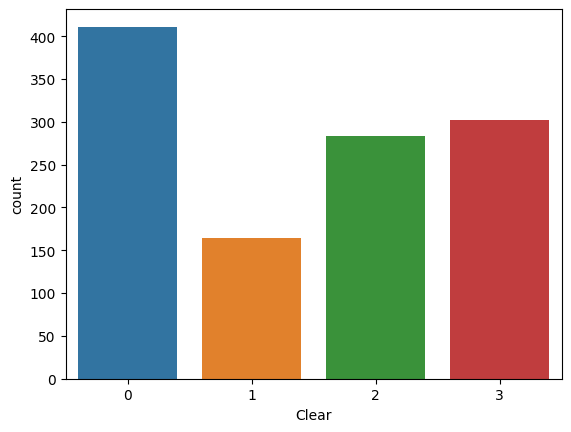

,count,ratio
3,802,0.691379
2,176,0.151724
0,107,0.092241
1,75,0.064655


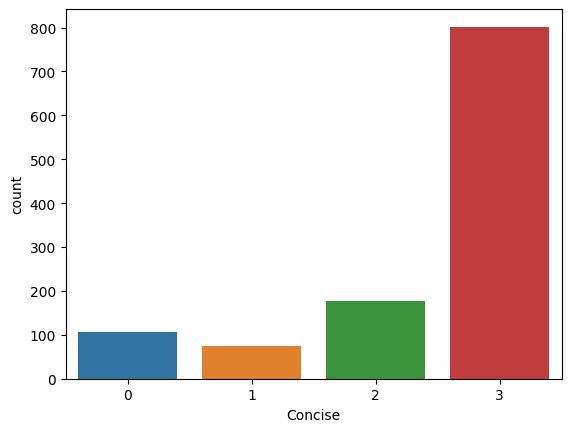

,count,ratio
3,447,0.385345
2,253,0.218103
0,249,0.214655
1,211,0.181897


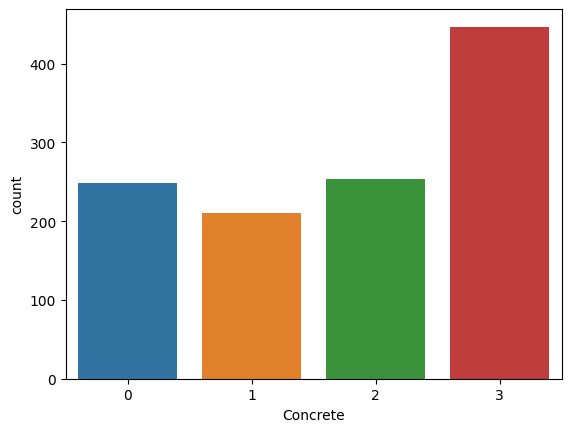

,count,ratio
2,554,0.477586
0,298,0.256897
3,201,0.173276
1,107,0.092241


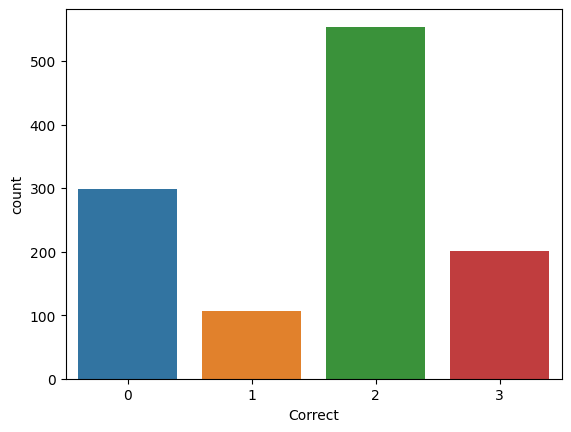

,count,ratio
0,1160,1.0


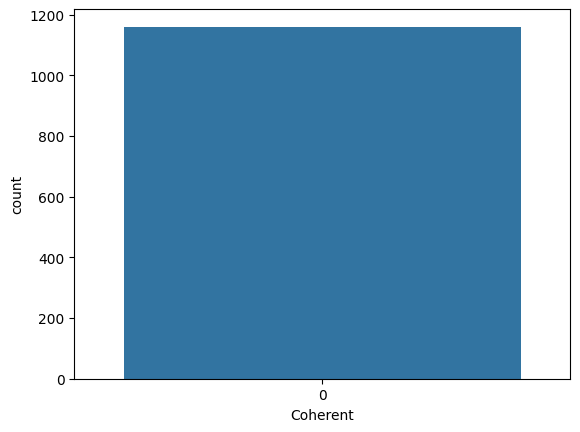

,count,ratio
3,647,0.557759
0,251,0.216379
2,208,0.179310
1,54,0.046552


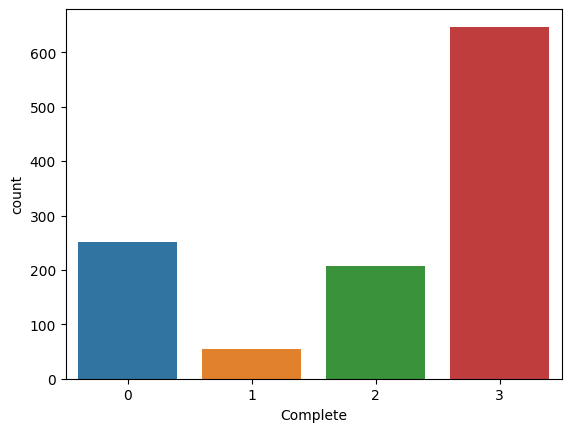

,count,ratio
2,428,0.368966
3,332,0.286207
1,239,0.206034
0,161,0.138793


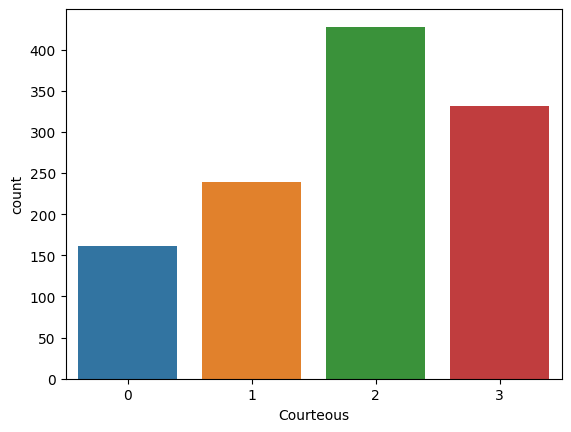

In [ ]:
for c in category:
    eda_1_cat(data, c)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
length,1160.0,48.993103,58.377649,2.0,18.75,32.0,53.0,704.0


<< 그래프 >>


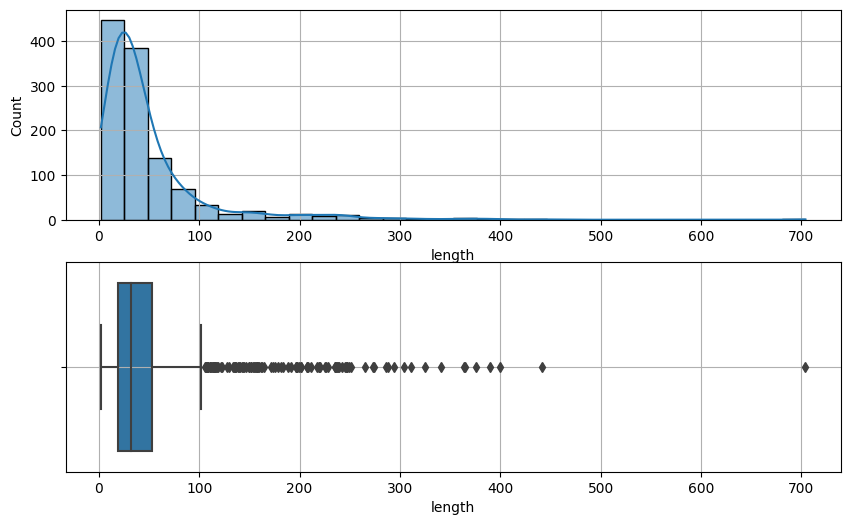

In [ ]:
# sentence_len = [len(s) for s in data["sentence"]]

temp = pd.DataFrame({"length": sentence_len})

eda_1_num(temp, "length")

# 학습

In [ ]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import ElectraForSequenceClassification, ElectraTokenizer
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

## tokenize

In [ ]:
from transformers import BertTokenizer, BertTokenizerFast
import re


# CHECKPOINT_NAME = 'bert-base-multilingual-cased' #'kykim/bert-kor-base'
CHECKPOINT_NAME = 'kykim/bert-kor-base'

# # add START_TOKEN and END_TOKEN
# data.loc[:, "sentence"] = data.loc[:, "sentence"].apply(lambda x: "[CLS] "+str(x)+" [SEP]")


# tokenize
tokenizer = BertTokenizer.from_pretrained(CHECKPOINT_NAME, do_lower_case=False)
# tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/344k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

In [ ]:
tokenized_texts = [tokenizer.tokenize("[CLS] "+str(s)+" [SEP]") for s in data.loc[:, "sentence"]]
data['tokenized'] = tokenized_texts


<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
length,1160.0,21.061207,20.958002,4.0,10.0,15.0,23.0,265.0


<< 그래프 >>


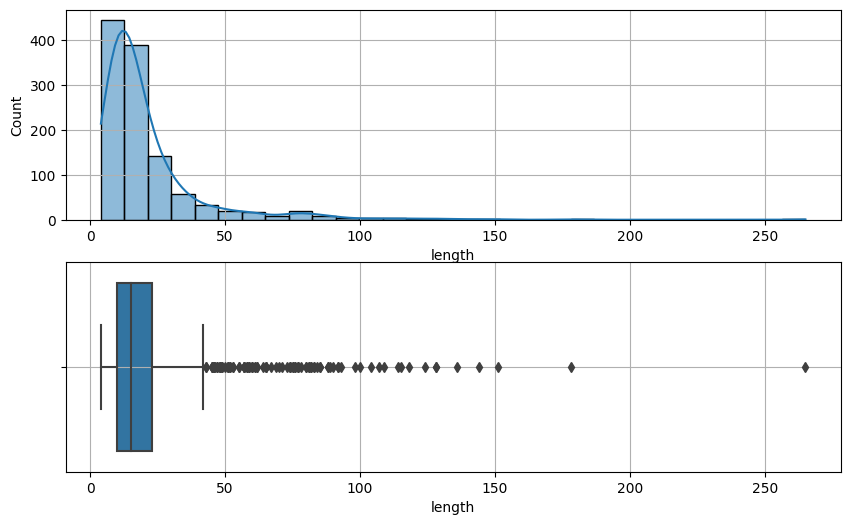

In [ ]:
temp = pd.DataFrame({"length": [len(s) for s in data['tokenized']]})

# temp = pd.DataFrame({"length": sentence_len})

eda_1_num(temp, "length")

In [ ]:
data['tokenized_len'] = [len(s) for s in data['tokenized']]

# 이변량 분석

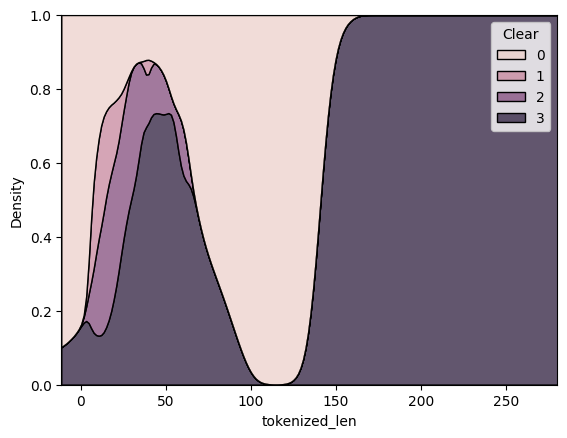

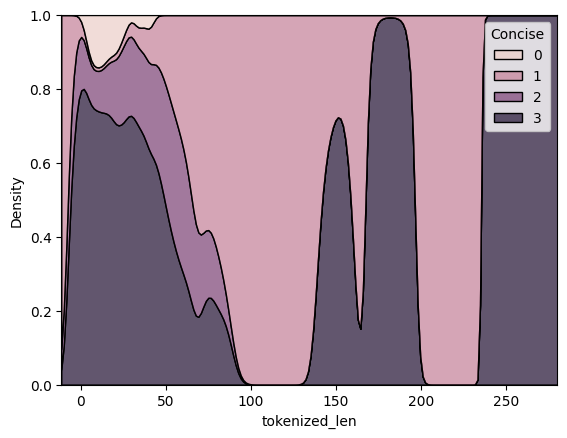

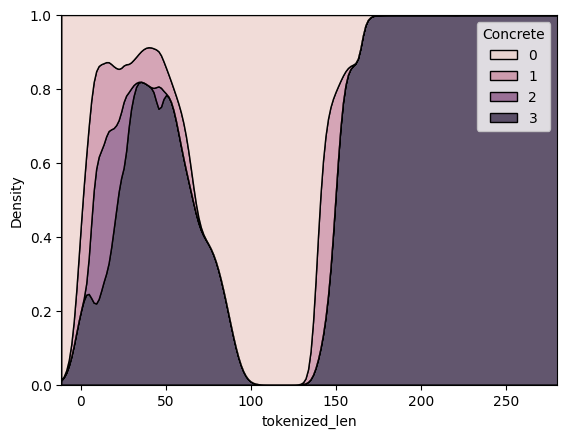

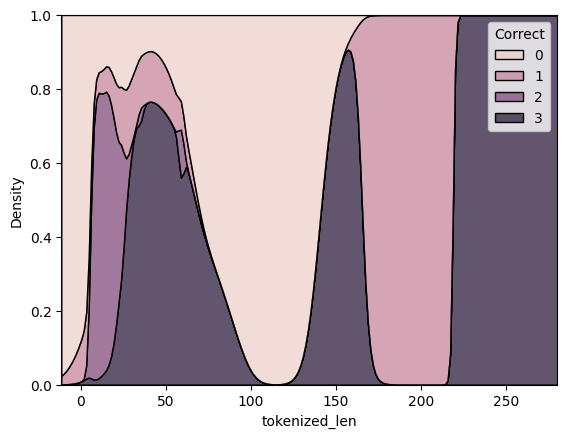

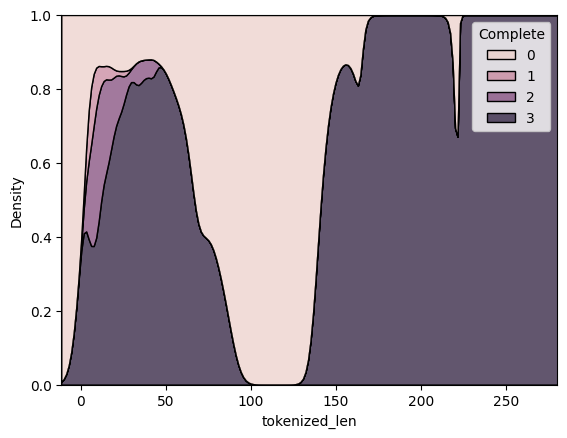

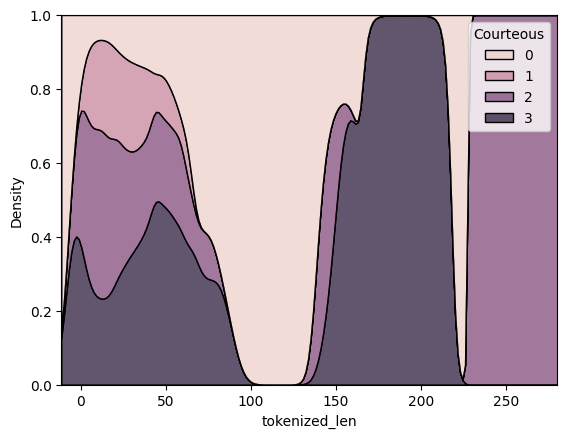

In [ ]:
cat =  ["Clear", "Concise", "Concrete", "Correct", "Complete", "Courteous"]
for c in cat:
    sns.kdeplot(x='tokenized_len', data = data, hue =c, multiple = 'fill')
    plt.show()

## padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# tokens: string to index
MAX_LEN = 256
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
data['input_ids'] = input_ids.tolist()

<ipython-input-157-9a4f79304e8d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input_ids'] = input_ids.tolist()


## attention mask

In [ ]:
attention_masks = [[ float(id > 0) for id in input_id] for input_id in input_ids]

for att, id in zip(attention_masks[0], input_ids[0]):
    print((att, id), end=" ")

data['attention_masks'] = attention_masks

(1.0, 2) (1.0, 2878) (1.0, 2014) (1.0, 1) (1.0, 15166) (1.0, 14746) (1.0, 8210) (1.0, 13992) (1.0, 2016) (1.0, 3) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0, 0) (0.0

<ipython-input-158-cfaff47f2489>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['attention_masks'] = attention_masks


## train test split

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

targets = category
x = data.drop(columns=targets, axis=1)

y = data.loc[:, TARGET]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((606, 4), (606,), (68, 4), (68,), (75, 4), (75,))

In [ ]:
x_train.head()

,sentence,tokenized,input_ids,attention_masks
856,카페는 소식하는 여자들이 좀 먹는 곳이죠? 저는 그런 게 아니라 든든하게 먹고 싶거든요.,"[[CLS], 카페, ##는, 소식, ##하는, 여자들이, 좀, 먹는, 곳이, ##...","[2, 14809, 8034, 21247, 13975, 40300, 6096, 14...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
385,다음 의제는 할로윈 파티입니다. 올해는 어떻게 할까요?,"[[CLS], 다음, 의, ##제는, 할로윈, 파티, ##입니다, ., 올해는, 어...","[2, 14153, 5907, 15556, 26958, 17500, 13992, 2...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,이나다씨 계십니까? 한 시간 정도 전에 전화주셨다고 하는데요.,"[[CLS], 이나, ##다, ##씨, 계, ##십니까, ?, 한, 시간, 정도, ...","[2, 23510, 8013, 8472, 2247, 26748, 2033, 7653...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
998,"네, 그건 알고 있습니다. 지원 조건 중 하나에 토익 800점 이상으로 들어갈 예정...","[[CLS], 네, ,, 그건, 알고, 있습니다, ., 지원, 조건, 중, 하나에,...","[2, 2878, 2014, 17512, 14644, 14041, 2016, 144...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
704,저건 K서비스가 하고 있는데. K서비스는 우리 사장님 동생이 하는 회사야.,"[[CLS], 저건, [UNK], 하고, 있는데, ., [UNK], 우리, 사장님,...","[2, 39859, 1, 14042, 14266, 2016, 1, 14020, 17...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


## data loader

In [ ]:
import torch

# convert tensor

train_inputs = torch.tensor(x_train.loc[:, "input_ids"].tolist())
train_masks = torch.tensor(x_train.loc[:, "attention_masks"].tolist())
train_labels = torch.tensor(y_train.tolist())
# train_labels_list = []
# for cat in category:
#     train_labels_list.append(torch.tensor(y_train[cat].tolist()))

val_inputs = torch.tensor(x_val.loc[:, "input_ids"].tolist())
val_masks = torch.tensor(x_val.loc[:, "attention_masks"].tolist())
val_labels = torch.tensor(y_val.tolist())
# val_labels_list = []
# for cat in category:
#     val_labels_list.append(torch.tensor(y_val[cat].tolist()))

test_inputs = torch.tensor(x_test.loc[:, "input_ids"].tolist())
test_masks = torch.tensor(x_test.loc[:, "attention_masks"].tolist())
test_labels = torch.tensor(y_test.tolist())
# test_labels_list = []
# for cat in category:
#     test_labels_list.append(torch.tensor(y_test[cat].tolist()))

train_inputs.shape, train_masks.shape, train_labels.shape, val_inputs.shape, val_masks.shape, val_labels.shape, test_inputs.shape, test_masks.shape, test_labels.shape

(torch.Size([606, 256]),
 torch.Size([606, 256]),
 torch.Size([606]),
 torch.Size([68, 256]),
 torch.Size([68, 256]),
 torch.Size([68]),
 torch.Size([75, 256]),
 torch.Size([75, 256]),
 torch.Size([75]))

In [ ]:
BATCH_SIZE = 16

# train_dataloader_list = []
# val_dataloader_list = []
# test_dataloader_list = []

# for i in range(7):
#     train_data = TensorDataset(train_inputs, train_masks, train_labels_list[i])
#     train_sampler = RandomSampler(train_data)
#     train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = BATCH_SIZE)
#     train_dataloader_list.append(train_dataloader)

#     val_data = TensorDataset(val_inputs, val_masks, val_labels_list[i])
#     val_sampler = SequentialSampler(val_data)
#     val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=BATCH_SIZE)
#     val_dataloader_list.append(val_dataloader)

#     test_data = TensorDataset(test_inputs, test_masks, test_labels_list[i])
#     test_sampler = SequentialSampler(test_data)
#     test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)
#     test_dataloader_list.append(test_dataloader)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = BATCH_SIZE)


val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=BATCH_SIZE)


test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)


In [ ]:
# CAT = len(data["Clear"].unique())
CAT = 4

## model 정의

In [ ]:
import torch.nn as nn
from transformers import BertModel

class CustomBertModel(nn.Module):
    def __init__(self, bert_pretrained, catv=5, dropout_rate=0.5):
        # 부모클래스 초기화
        super(CustomBertModel, self).__init__()
        # 사전학습 모델 지정
        self.bert = BertModel.from_pretrained(bert_pretrained)
        # bert freeze
        for param in self.bert.parameters():
            param.requires_grad = False
        # dropout 설정
        self.dr = nn.Dropout(p=dropout_rate)
        # 최종 출력층 정의
        self.fc1 = nn.Linear(768, 32)
        self.dr = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(32, catv)

    def forward(self, input_ids, attention_mask, token_type_ids):
        # 입력을 pre-trained bert model 로 대입
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        # 결과의 last_hidden_state 가져옴
        last_hidden_state = output['last_hidden_state']
        # last_hidden_state[:, 0, :]는 [CLS] 토큰을 가져옴
        x = self.dr(last_hidden_state[:, 0, :])
        # FC 을 거쳐 최종 출력
        x = self.fc1(x)
        x = self.fc2(x)
        return x

## device에 모델 올리기

In [ ]:
if torch.cuda.is_available():
    print("cuda")
    device = torch.device("cuda:0")
else:
    print("cpu")
    device = torch.device("cpu")


# model = ElectraForSequenceClassification.from_pretrained("monologg/koelectra-base-v3-discriminator", num_labels=CAT)
# model = BertForSequenceClassification.from_pretrained(CHECKPOINT_NAME, num_labels=CAT)
model = CustomBertModel(CHECKPOINT_NAME, CAT)
model.to(device)

cuda


pytorch_model.bin:   0%|          | 0.00/476M [00:00<?, ?B/s]

CustomBertModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(42000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [ ]:
# index = 0
# # bert freeze 하기
# for param in model.parameters():
#     index += 1
#     if index >= 200: break
#     param.requires_grad = False

# print(len(model.parameters()))

# train 항목마다 바꿔주세요!!!!!!!


## TRAIN


In [ ]:
# transformers에서 제공하는 옵티마이저 중 AdamW를 사용
# 총 훈련 스텝은 이터레이션 * 에폭 수로 설정
# 러닝 레잇 스케쥴러도 transformers에서 제공하는것을 사용
print('schedule start')
#옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 3

# 총 훈련 스텝
total_steps = len(train_dataloader) * epochs


# lr 조금씩 감소시키는 스케줄러
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

##학습
# accuracy 와 시간 표시함수 정의
# 정확도 계산 함수
print('train start')
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

    return np.sum(preds == labels) / len(labels)

# 시간 표시 함수
def format_time(elapsed):
    # 반올림
    elapsed_rounded = int(round((elapsed)))
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

schedule start
train start


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# 데이터로더에서 배치만큼 가져온 후 forward, backward pass를 수행
# gradient update는 명시적으로 하지 않고 위에서 로드한 optimizer를 활용
# 재현을 위해 랜덤시드 고정
# 모든 Epoch를 학습하면 학습이 종료
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import torch.nn as nn

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# loss
loss_fn = nn.CrossEntropyLoss()

#
# running_loss = 0
corr = 0
counts = 0


# 에폭만큼 반복
for epoch_i in range(0, epochs):
    running_loss = 0
    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss, total_accuracy = 0, 0

    # 훈련모드로 변경
    model.train()

    prograss_bar = tqdm(train_dataloader, unit='batch', total=len(train_dataloader), mininterval=1, leave=True)

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(prograss_bar):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # optimizer
        optimizer.zero_grad()

        # Forward 수행
        output = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        # labels=b_labels # not this model
                        )



        # 해당 부분은 custumemodel 학습 시 사용하는 부분입니다.
        # # 로스 구함 custom model
        loss = loss_fn(output, b_labels)
        # loss = output[0]
        # loss = output.loss
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑 ????
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화 ?????
        # model.zero_grad()

        # 학습 정확도
        # pred = [torch.argmax(logit).cpu().detach().item() for logit in output.logits]
        _, pred = output.max(dim=1)
        true = [label for label in b_labels.cpu().numpy()]
        accuracy = accuracy_score(true, pred.cpu())
        total_accuracy += accuracy

        running_loss += loss.item() * b_labels.size(0)

        prograss_bar.set_description(f"training loss: {running_loss/(step+1):.5f}") # , training accuracy: {corr / counts:.5f} 나중에 with no grad 해야하나?

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)
    avg_train_accuracy = total_accuracy / len(train_dataloader)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Average training avg: {0:.2f}".format(avg_train_accuracy))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in val_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # 그래디언트 계산 안함
        with torch.no_grad():
            # Forward 수행
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # 로스 구함
        logits = outputs.argmax(axis=1)
        # logits = outputs[0]
        # logits = outputs.argmax(axis=1)
        # logits = outputs.logits.argmax(axis=1) # bert classification

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()


        # 출력 로짓과 라벨을 비교하여 정확도 계산
        # print(logits.shape, label_ids.shape)
        tmp_eval_accuracy = accuracy_score(label_ids, logits)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")
print("")


======== Epoch 1 / 3 ========
Training...


training loss: 22.60048: 100%|██████████| 38/38 [00:09<00:00,  4.13batch/s]



  Average training loss: 1.42
  Average training avg: 0.28
  Training epcoh took: 0:00:09

Running Validation...
  Accuracy: 0.33
  Validation took: 0:00:01

======== Epoch 2 / 3 ========
Training...


training loss: 21.44396: 100%|██████████| 38/38 [00:09<00:00,  4.04batch/s]



  Average training loss: 1.34
  Average training avg: 0.32
  Training epcoh took: 0:00:09

Running Validation...
  Accuracy: 0.34
  Validation took: 0:00:01

======== Epoch 3 / 3 ========
Training...


training loss: 20.45986: 100%|██████████| 38/38 [00:09<00:00,  3.94batch/s]



  Average training loss: 1.28
  Average training avg: 0.35
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy: 0.35
  Validation took: 0:00:01

Training complete!



# test

In [ ]:
print('test start')
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
y_pred = []
y_label = []

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)

    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch

    # 그래디언트 계산 안함
    with torch.no_grad():
        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    # 로스 구함
    # logits = outputs[0]
    # logits = outputs["logits"].argmax(axis=1) # bertclassification
    logits = outputs.argmax(axis=1)

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = accuracy_score(logits, label_ids)
    y_pred += logits.tolist()
    y_label += label_ids.tolist()
    # print(len(y_pred))
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
    # print(nb_eval_steps)

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))
print("test finished!")

test start

Accuracy: 0.39
Test took: 0:00:01
test finished!


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# print(classification_report(y_label, y_pred))
print("valid")
print("\n".join(classification_report(y_label, y_pred, zero_division = 0).split('\n')[-4:-1]))


valid
    accuracy                           0.84       106
   macro avg       0.90      0.58      0.66       106
weighted avg       0.85      0.84      0.81       106


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# print(classification_report(y_label, y_pred))
print("test")
print("\n".join(classification_report(y_label, y_pred, zero_division = 0).split('\n')[-4:-1]))

test
    accuracy                           0.53        75
   macro avg       0.54      0.54      0.54        75
weighted avg       0.54      0.53      0.54        75


# save

In [ ]:
############################################################################
# 이름 바꾸세요!
############################################################################

# PATH = "/content/drive/MyDrive/data/data/big_project/model_Clear3"

# torch.save(model.state_dict(), PATH)

# load

In [ ]:
# !pip install mlflow

In [ ]:
# import torch.nn as nn
# from transformers import BertModel
# import torch

# class CustomBertModel(nn.Module):
#     def __init__(self, bert_pretrained, catv=5, dropout_rate=0.5):
#         # 부모클래스 초기화
#         super(CustomBertModel, self).__init__()
#         # 사전학습 모델 지정
#         self.bert = BertModel.from_pretrained(bert_pretrained)
#         # dropout 설정
#         self.dr = nn.Dropout(p=dropout_rate)
#         # 최종 출력층 정의
#         self.fc1 = nn.Linear(768, 64)
#         self.fc2 = nn.Linear(64, catv)

#     def forward(self, input_ids, attention_mask, token_type_ids):
#         # 입력을 pre-trained bert model 로 대입
#         output = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
#         # 결과의 last_hidden_state 가져옴
#         last_hidden_state = output['last_hidden_state']
#         # last_hidden_state[:, 0, :]는 [CLS] 토큰을 가져옴
#         x = self.dr(last_hidden_state[:, 0, :])
#         # FC 을 거쳐 최종 출력
#         x = self.fc1(x)
#         x = self.fc2(x)
#         return x

In [ ]:
# CHECKPOINT_NAME = 'bert-base-multilingual-cased'
# CAT = 4
# PATH = "/content/drive/MyDrive/data/data/big_project/model_Clear"

# model_load = CustomBertModel(CHECKPOINT_NAME, CAT)

# model_load.load_state_dict(torch.load(PATH))

<All keys matched successfully>

# mlflow 저장
## train 항목마다 바꿔주세요!!!!!!!

In [ ]:
# import mlflow

# mlflow_uri="https://mlflow.aivle0412.duckdns.org"
# mlflow.set_tracking_uri(mlflow_uri)

In [ ]:
# exp_id = mlflow.create_experiment("exp")
# my_name = 'bjh'
# team_name = 'big_project_12'

In [ ]:
# with mlflow.start_run(experiment_id = exp_id, run_name = my_name) as run:
#     mlflow.pytorch.log_model(model_load, "model_Clear", registered_model_name = team_name)

In [ ]:
# run.info.run_id

In [ ]:
# # model_uri = f"runs:/{run.info.run_id}/model"
# # loaded_model = mlflow.pytorch.load_model(model_uri)

# model_uri = "models:/big_project_12/production"
# model_p = mlflow.pytorch.load_model(model_uri)

In [ ]:
# if torch.cuda.is_available():
#     print("cuda")
#     device = torch.device("cuda:0")
# else:
#     print("cpu")
#     device = torch.device("cpu")

# model_p.to(device)

In [ ]:
# import time

# def flat_accuracy(preds, labels):

#     return np.sum(preds == labels) / len(labels)

# print('test start')
# #시작 시간 설정
# t0 = time.time()

# # 평가모드로 변경
# model_p.eval()

# # 변수 초기화
# eval_loss, eval_accuracy = 0, 0
# nb_eval_steps, nb_eval_examples = 0, 0
# y_pred = []
# y_label = []

# # 데이터로더에서 배치만큼 반복하여 가져옴
# for step, batch in enumerate(test_dataloader):
#     # 경과 정보 표시
#     if step % 100 == 0 and not step == 0:
#         elapsed = format_time(time.time() - t0)
#         print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

#     # 배치를 GPU에 넣음
#     batch = tuple(t.to(device) for t in batch)

#     # 배치에서 데이터 추출
#     b_input_ids, b_input_mask, b_labels = batch

#     # 그래디언트 계산 안함
#     with torch.no_grad():
#         # Forward 수행
#         outputs = model_p(b_input_ids,
#                         token_type_ids=None,
#                         attention_mask=b_input_mask)

#     # 로스 구함
#     # logits = outputs[0]
#     logits = outputs.argmax(axis=1)
#     # logits = outputs

#     # CPU로 데이터 이동
#     logits = logits.detach().cpu().numpy()
#     label_ids = b_labels.to('cpu').numpy()

#     # 출력 로짓과 라벨을 비교하여 정확도 계산
#     tmp_eval_accuracy = flat_accuracy(logits, label_ids)
#     y_pred += logits.tolist()
#     y_label += label_ids.tolist()
#     # print(len(y_pred))
#     eval_accuracy += tmp_eval_accuracy
#     nb_eval_steps += 1
#     # print(nb_eval_steps)

# print("")
# print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
# print("Test took: {:}".format(format_time(time.time() - t0)))
# print("test finished!")